<a href="https://colab.research.google.com/github/estermartins/Machine-Learning/blob/master/Aula1004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import LeaveOneOut, KFold, train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.utils import resample

In [2]:
bd = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
bd.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
bd.loc[bd["horsepower"] == "?", "horsepower"] = np.nan
bd = bd.dropna()
bd.horsepower = bd.horsepower.astype("float64")
bd.horsepower.describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [0]:
y = bd.mpg
x = bd.horsepower
y = np.array(y)
x = np.array(x)
x = x.reshape(-1,1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 5) # split = gera números aleatórios
reg = LinearRegression()
reg.fit(x_train, y_train)
yhat = reg.predict(x_test)
medida = mean_squared_error(y_test, yhat)
print("MSE for Simple Linear Regression", medida)

MSE for Simple Linear Regression 34.61244348009658


In [6]:
loo = LeaveOneOut()

mse_list = []

for train, test in loo.split(x):
  x_train, x_test = x[train], x[test]
  y_train, y_test = y[train], y[test]
  reg.fit(x_train, y_train)
  yhat = reg.predict(x_test)
  medida = mean_squared_error(y_test, yhat)
  mse_list.append(medida)
  
print(mse_list)
mse_array = np.array(mse_list)

[2.0200100243216412, 1.2509241240422861, 3.0680516401639832, 0.06799019837204447, 0.7082556294244434, 41.35667450716614, 81.37553579730985, 67.14947672916045, 97.0498846570756, 26.343036823043395, 3.6742869739717334, 0.47074169056782245, 1.6050778867388114, 97.0498846570756, 0.889557151130716, 8.69418109789263, 44.12289653365883, 30.656222509959473, 0.9165497318131822, 45.31853784962301, 1.457052807537722, 3.0098355440288405, 0.0035461760456729618, 15.29640877266284, 22.502220796825593, 16.79054457227355, 2.7673535145602908, 18.535464818187215, 0.22995747384892581, 0.9165497318131822, 5.183799994543558, 0.0035461760456725385, 26.674551027218364, 54.47911198315076, 51.407832368845995, 49.94052560583025, 38.03600056861017, 0.011988458474187537, 2.9103300297208614, 3.2310436344767135, 5.166911181280724, 0.23248733238398803, 0.010667890815345995, 0.48261526388764725, 21.021111412644863, 43.558519729146084, 26.674551027218364, 65.12311616023943, 11.369041835374313, 5.183799994543558, 1.2508

In [7]:
print("MSE with LOOCV:", mse_array.mean())

MSE with LOOCV: 24.231513517929226


In [8]:
kf10 = KFold(10)

mse_list = []
for train, test in kf10.split(bd):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    reg.fit(x_train, y_train)
    yhat = reg.predict(x_test)
    measure = mean_squared_error(y_test, yhat)
    mse_list.append(measure)

mse_array = np.array(mse_list)
print(len(mse_array))
print("MSE with 5-Fold CV: " ,mse_array.mean())

10
MSE with 5-Fold CV:  27.439933652339874


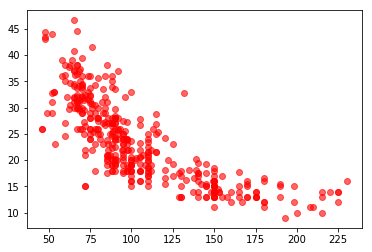

In [9]:
plt.scatter(x=bd.horsepower, y=bd.mpg, color="red", alpha=.6)
plt.show()

In [10]:
x_list = [x]

for i in range (2,11):
  poly = PolynomialFeatures(i)
  new = poly.fit_transform(x)
  x_list.append(new)
  
len(x_list)  

10

In [11]:
kf10 = KFold(10)

mse_list = []

for i, (train, test) in enumerate(kf10.split(bd)):
  x_train, x_test = x_list[i][train], x_list[i][test]
  y_train, y_test = y[train], y[test]
  reg.fit(x_train, y_train)
  yhat = reg.predict(x_test)
  medida = mean_squared_error(y_test, yhat)
  mse_list.append(medida)
  
print(len(mse_list))
print(mse_list)

10
[28.347835840972245, 16.55513797223718, 19.976595572221957, 21.775113683003745, 13.003991122443246, 10.82388180760425, 11.879517003719084, 20.408014892919084, 49.80978123230409, 35.838837191072564]


Estimar intervalo de confiança com bootstrap

In [12]:
bd.horsepower.mean()

104.46938775510205

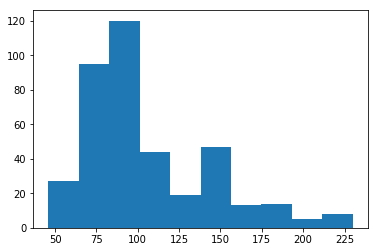

In [13]:
plt.hist(bd.horsepower)
plt.show()

In [15]:
n = bd.shape[0]
n

392

In [29]:
# Configurar o bootstrap
n_iterations = 1000
n_size = n

# Executa o bootstrap
mediashp = []
for i in range(n_iterations):
  bdre = resample(bd, replace=True, n_samples = n)
  media = bdre.horsepower.mean()
  mediashp.append(media)
  
print(len(mediashp))  

1000


In [21]:
mediashp[:20]

[106.0688775510204,
 104.05357142857143,
 104.85969387755102,
 100.41326530612245,
 103.1938775510204,
 100.74744897959184,
 104.13010204081633,
 103.22193877551021,
 104.66581632653062,
 102.85714285714286,
 106.80102040816327,
 106.4234693877551,
 105.04336734693878,
 103.97193877551021,
 105.09948979591837,
 102.51785714285714,
 101.63265306122449,
 104.86989795918367,
 101.8061224489796,
 102.16071428571429]

In [22]:
# Função para calcular o erro padrão
def stderr(x):
    n = len(x)
    return np.std(x) / np.sqrt(n)
  
# Função para calcular o intervalo de confiança
def confint95(x):
    err = stderr(x)
    up = np.mean(x) + 1.96*err
    low = np.mean(x) - 1.96*err
    return np.array([low, up])

print("Erro padrão da média de MSE: ", stderr(mse_list))
print("Intervalo de confiança do MSE: ", confint95(mse_list))

Erro padrão da média de MSE:  3.6642714873707183
Intervalo de confiança do MSE:  [15.65989852 30.02384275]


In [30]:
CIs = []
SEs = []
medias = []

for i in range(n_iterations):
  bdre = resample(bd, n_samples = n)
  media = bdre.horsepower.mean()
  SE = stderr(bdre.horsepower)
  CI = confint95(bd.horsepower)
  CIs.append(CI)
  SEs.append(SE)
  medias.append(media)
  
print(len(CIs))
print(len(SEs))
print(len(medias))

1000
1000
1000


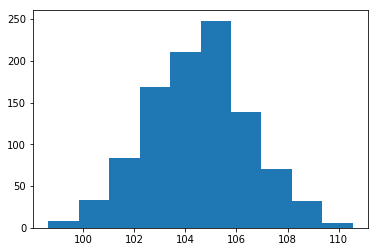

In [31]:
plt.hist(medias)
plt.show()

In [34]:
# Calculando o intervalo de confiança para as médias amostrais

lowers = []
uppers = []
for i in range(len(CIs)):
  lowers.append(CIs[i][0])
  uppers.append(CIs[i][0])
  
med_lowers = np.mean(lowers)
med_uppers = np.mean(uppers)

print("A média populacional de jorsepower está entre", med_lowers, "e", med_uppers)

A média populacional de jorsepower está entre 100.66382067300682 e 100.66382067300682
